**Part 2:** Defining transport sections over the rim of the canyon and surrounding shelf and slope.

In [1]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Function: Download mesh mask variables

In [2]:
def get_variables_planes(dirname, filename):
    
    with nc.Dataset(os.path.join(dirname, filename), 'r') as nbl:
        x, y =  slice(1,-1,None), slice(1,-1,None)
        gdepw = nbl.variables['gdepw_1d'][0, :]
        tmask = nbl.variables['tmask'][0, :, y, x]
        mbathy = nbl.variables['mbathy'][0, y, x]
        e1t = nbl.variables['e1t'][0, y, x]
        e2t = nbl.variables['e2t'][0, y, x]  
        
        return gdepw, tmask, mbathy, e1t, e2t

In [3]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepwn, tmaskn, mbathyn, e1tn, e2tn = get_variables_planes(dirname, filename)

In [4]:
xs = np.arange(mbathyn.shape[-1])
ys = np.arange(mbathyn.shape[-2])

mbathy.shape, e1t.shape, e2t.shape, tmask.shape

((272, 242), (272, 242), (272, 242), (80, 272, 242))

# Function: Build Surface Mask

In [5]:
def build_surface_mask(tmask_nocanyon, mbathy_nocanyon):
    
    surface_mask = np.zeros_like(tmask_nocanyon)
    for i in range(tmask_nocanyon.shape[-1]):
        for j in range(tmask_nocanyon.shape[-2]):
            k = mbathy_nocanyon[j, i]
            surface_mask[k, j, i] = 1
            
    return surface_mask

### Visualizing the curtain over the no canyon shelf/slope

In [6]:
def plot_surface_mask(surface_mask, N, deps):
    fig, ax = plt.subplots(1, N, figsize=(20, 5), sharey=True)
    ax[0].set_ylabel('y inds', fontsize=14)
    for n, dep in zip(np.arange(N), deps):
        p = ax[n].pcolormesh(surface_mask[dep, :, :], cmap=cm.hot_r)
        plt.setp( ax[n].get_xticklabels(), visible=False)
        ax[n].set_title(str(dep) + ' = ' + str(int(gdepwn[dep])) + ' m', fontsize=14)
        ax[n].grid()
        ax[n].set_xlim([0, surface_mask.shape[-1]])
        ax[n].set_ylim([0, surface_mask.shape[-2]])
        ax[n].set_xlabel('x inds', fontsize=14)
    fig.suptitle('Surface Mask at every depth index (black=1, white=0)', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    ax1.plot(mbathyn[:, int(0.5*mbathyn.shape[-1])], linewidth=2, c='k')
    ax1.set_ylim([deps[-1], deps[0]])
    ax1.grid()
    ax1.set_xlabel('y inds', fontsize=14)
    ax1.set_ylabel('z inds', fontsize=14)
    ax1.set_title('depth ind profile', fontsize=14)
    ax2.pcolormesh(xs, ys, mbathyn, cmap=cm.Blues)
    c = ax2.contour(xs, ys, mbathyn, levels = deps, colors='k')
    ax2.clabel(c, inline=1, fontsize=10)
    ax2.set_xlabel('x inds', fontsize=14)
    ax2.set_ylabel('y inds', fontsize=14)
    ax2.set_title('mbathy with depth ind steps', fontsize=14)
    return fig

In [7]:
surface_mask = build_surface_mask(tmaskn, mbathyn)

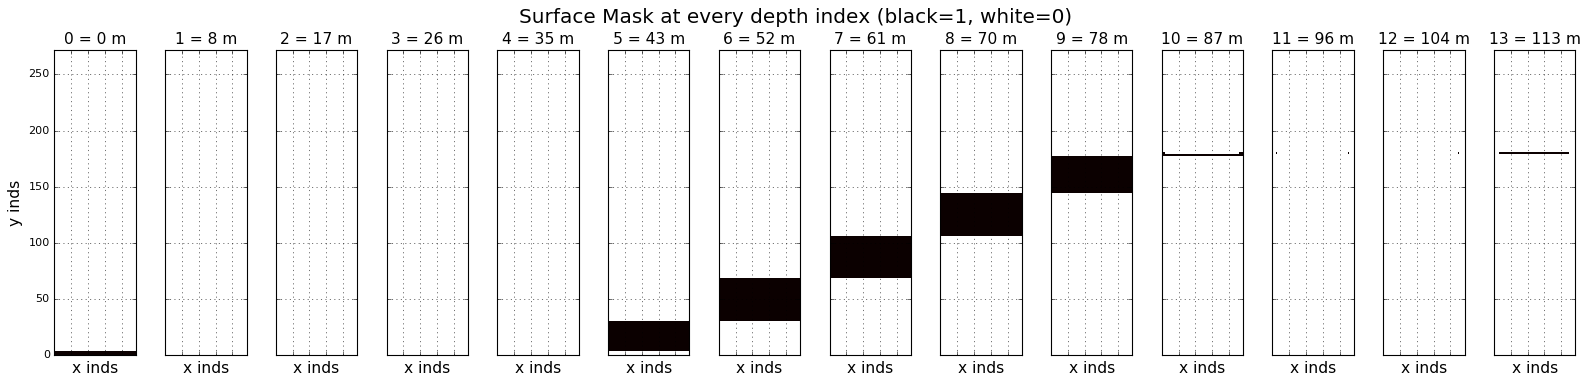

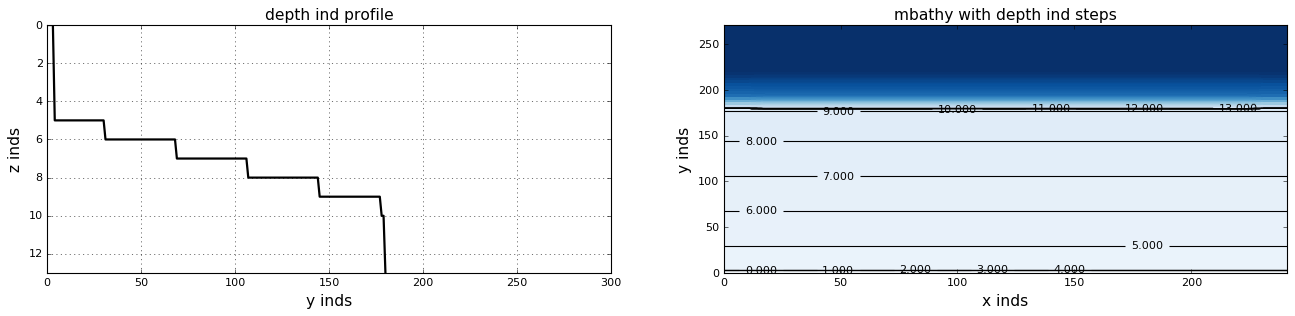

In [8]:
N = 14
deps = np.arange(0, 0+N)
fig = plot_surface_mask(surface_mask, N, deps)

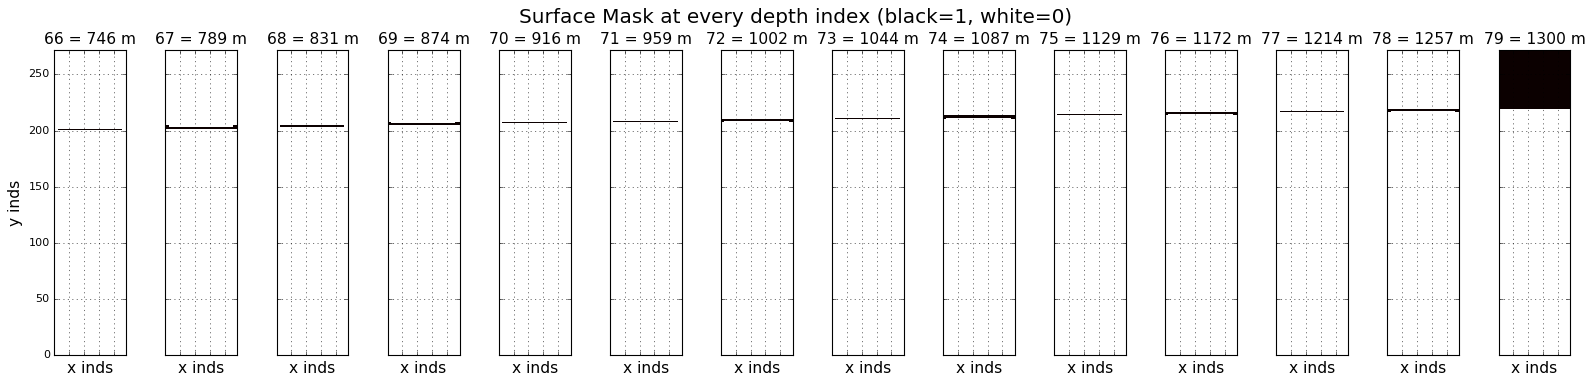

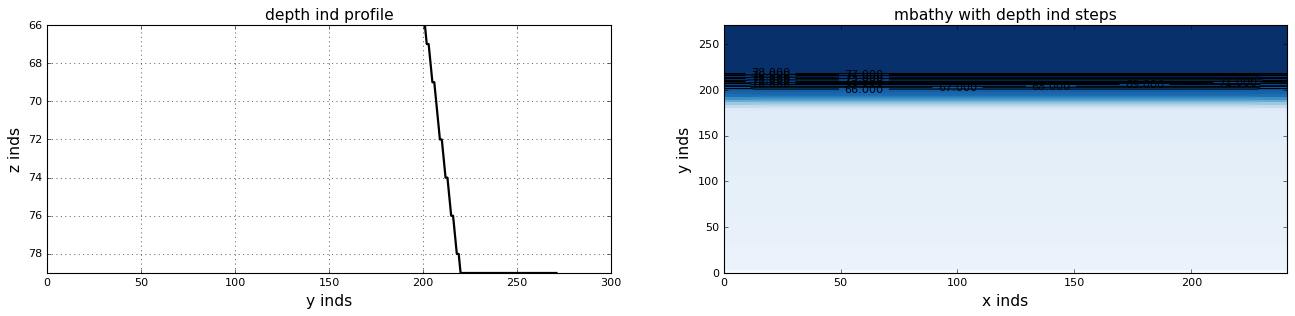

In [9]:
N = 14
deps = np.arange(66, 66+N)
fig = plot_surface_mask(surface_mask, N, deps)

# Canyon axis (thalweg)

In [10]:
mbathy_diff = mbathy - mbathyn

axis_thalweg = np.zeros(mbathy_diff.shape[-2])

for y in range(len(axis_thalweg)):
    mbathy_row = mbathy_diff[y, :]
    max_mbathy_row = mbathy_row.max()
    x_inds_max_mbathy_row = np.where(mbathy_row == max_mbathy_row)[0]
    x_ind_thalweg = int(np.median(x_inds_max_mbathy_row))
    axis_thalweg[y] = x_ind_thalweg

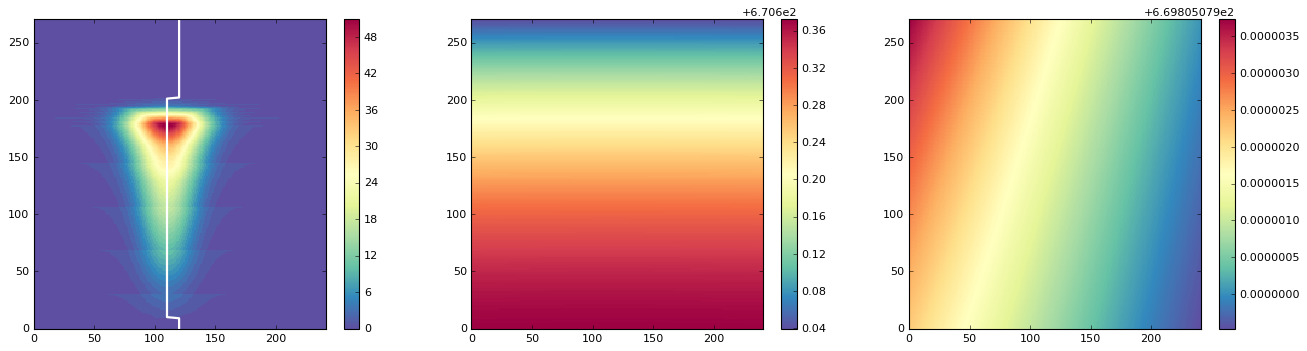

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
p1 = ax1.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r)
p2 = ax2.pcolormesh(xs, ys, e1t, cmap=cm.Spectral_r)
p3 = ax3.pcolormesh(xs, ys, e2t, cmap=cm.Spectral_r)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])
fig.colorbar(p1, ax=ax1); fig.colorbar(p2, ax=ax2); fig.colorbar(p3, ax=ax3)

ax1.plot(axis_thalweg, ys, c='w', linewidth=2)